<a href="https://colab.research.google.com/github/tanyajainC137/COVID-19-Global-Analysis/blob/master/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline 

In [350]:
data = pd.read_csv('https://raw.githubusercontent.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning/master/covid_19_clean_complete.csv')
data.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0.0,0,0.0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0.0,0,0.0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0.0,0,0.0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0.0,0,0.0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0.0,0,0.0,Africa


In [351]:
#correcting error in data
data['Deaths'][36458] = 5738 #and data[data['Date'] == '2020-06-09']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [352]:
data.shape

(36540, 10)

In [353]:
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,36540.000000,36540.000000,3.654000e+04,36540.000000,36540.000000,3.654000e+04
mean,21.362269,23.701848,7.640045e+03,487.626628,2682.252299,4.464748e+03
std,24.969908,70.158251,6.221162e+04,4108.228671,17990.480892,4.399566e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000,-9.292900e+04
25%,7.540000,-15.310100,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,23.685000,21.758700,5.900000e+01,0.000000,3.000000,1.200000e+01
75%,41.204400,81.000000,7.290000e+02,9.000000,181.000000,3.050000e+02
max,71.706900,178.065000,1.979411e+06,111989.000000,524855.000000,1.342567e+06


In [354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36540 entries, 0 to 36539
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  10920 non-null  object 
 1   Country/Region  36540 non-null  object 
 2   Lat             36540 non-null  float64
 3   Long            36540 non-null  float64
 4   Date            36540 non-null  object 
 5   Confirmed       36540 non-null  int64  
 6   Deaths          36540 non-null  float64
 7   Recovered       36540 non-null  int64  
 8   Active          36540 non-null  float64
 9   WHO Region      36540 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 2.8+ MB


In [0]:
data['Date'] = pd.to_datetime(data['Date'].astype(str), format = '%Y-%m-%d' )

In [356]:
data.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                   float64
Recovered                  int64
Active                   float64
WHO Region                object
dtype: object

In [357]:
#assessing NaN values
data[data['Province/State'].isnull()]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0.0,0,0.0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0.0,0,0.0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0.0,0,0.0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0.0,0,0.0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0.0,0,0.0,Africa
...,...,...,...,...,...,...,...,...,...,...
36535,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-09,514,12.0,76,426.0,Africa
36536,NaN,Yemen,15.552727,48.516388,2020-06-09,524,0.0,0,524.0,Eastern Mediterranean
36537,NaN,Comoros,-11.645500,43.333300,2020-06-09,141,2.0,67,72.0,Africa
36538,NaN,Tajikistan,38.861034,71.276093,2020-06-09,4690,0.0,0,4690.0,Europe


In [358]:
#exploring china data
data[data['Country/Region'] == 'China']['Province/State'].value_counts()

Guangxi           140
Macau             140
Hubei             140
Yunnan            140
Guizhou           140
Gansu             140
Xinjiang          140
Tibet             140
Fujian            140
Jilin             140
Beijing           140
Chongqing         140
Tianjin           140
Henan             140
Qinghai           140
Heilongjiang      140
Ningxia           140
Shanxi            140
Jiangxi           140
Inner Mongolia    140
Sichuan           140
Shanghai          140
Shaanxi           140
Zhejiang          140
Guangdong         140
Hunan             140
Liaoning          140
Jiangsu           140
Hebei             140
Hainan            140
Anhui             140
Shandong          140
Hong Kong         140
Name: Province/State, dtype: int64

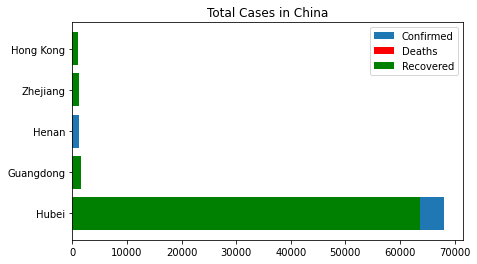

In [359]:
china_data = data[data['Country/Region'] == 'China']
china_data = china_data[china_data['Date'] == max(data['Date'])].sort_values(['Confirmed'], ascending = False)
china_data = china_data.head(5)
plt.figure(figsize= (7,4))
plt.barh(china_data['Province/State'], width = china_data['Confirmed'], label = 'Confirmed')
plt.barh(china_data['Province/State'], width = china_data['Deaths'], label = 'Deaths', color = 'r')
plt.barh(china_data['Province/State'], width = china_data['Recovered'], label = 'Recovered', color = 'green')
plt.legend()
plt.title('Total Cases in China')
plt.show()


In [360]:
#exploring global daily trend
daywise = data.groupby(['Date'])['Confirmed', 'Deaths'].agg([sum])
daywise.reset_index(inplace = True)
daywise.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Confirmed,Deaths
,,sum,sum
135,2020-06-05,6764177,395044.0
136,2020-06-06,6890472,398874.0
137,2020-06-07,7009608,401890.0
138,2020-06-08,7117730,405682.0
139,2020-06-09,7241494,410580.0


<Figure size 432x288 with 0 Axes>

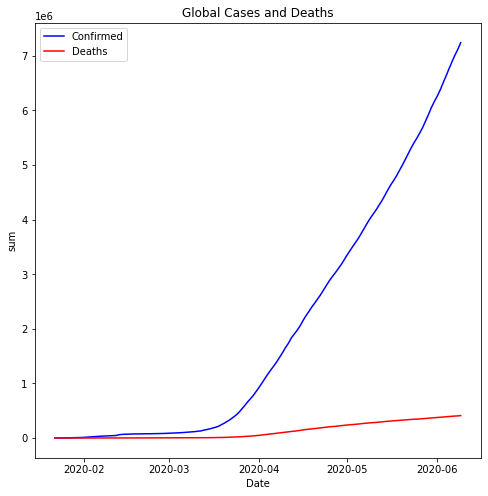

In [361]:
plt.figure()
plt.figure(figsize=(8,8))
sns.lineplot(daywise['Date'], daywise['Confirmed']['sum']  , color ='b')
sns.lineplot(daywise['Date'], daywise['Deaths']['sum'], color = 'r')
plt.legend(['Confirmed','Deaths'])
plt.title('Global Cases and Deaths')
plt.show()

In [362]:
data.nunique()

Province/State      78
Country/Region     187
Lat                254
Long               257
Date               140
Confirmed         6575
Deaths            2185
Recovered         4134
Active            5565
WHO Region           6
dtype: int64

In [363]:
#Identifying worst hit countries

countrywise = data.groupby(['Country/Region','Date'])['Confirmed', 'Deaths', 'Recovered'].agg(sum)
countrywise = countrywise.reset_index()
countrywise.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0.0,0
1,Afghanistan,2020-01-23,0,0.0,0
2,Afghanistan,2020-01-24,0,0.0,0
3,Afghanistan,2020-01-25,0,0.0,0
4,Afghanistan,2020-01-26,0,0.0,0


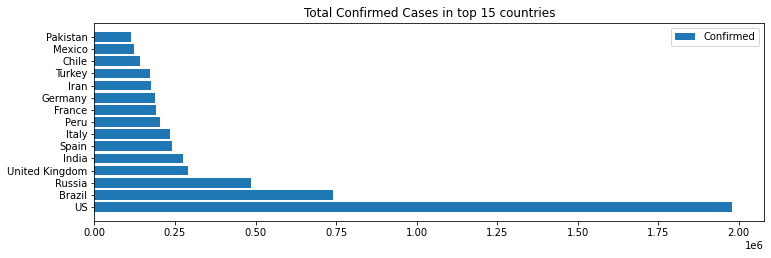

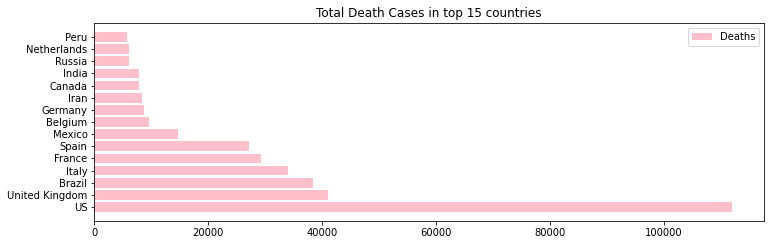

In [364]:
maxdate = max(data['Date'])

maxrows = countrywise[countrywise['Date'] == maxdate]
maxrows = maxrows.sort_values(['Confirmed'], ascending = False)
maxrows = maxrows.head(15)

plt.figure(figsize = (12,8))
plt.subplot(2,1,1)
plt.barh(maxrows['Country/Region'], width = maxrows['Confirmed'])
plt.legend(['Confirmed', 'Deaths'])
plt.title('Total Confirmed Cases in top 15 countries')
plt.show()

maxrowsd = countrywise[countrywise['Date'] == maxdate]
maxrowsd = maxrowsd.sort_values(['Deaths'], ascending = False)
maxrowsd = maxrowsd.head(15)

plt.figure(figsize = (12,8))
plt.subplot(2,1,2)
plt.barh(maxrowsd['Country/Region'], width = maxrowsd['Deaths'], color = 'pink')
plt.legend([ 'Deaths'])
plt.title('Total Death Cases in top 15 countries')
plt.show()

In [365]:
maxrowsf = maxrows['Country/Region']
maxrowsf = maxrowsf.append(maxrowsd['Country/Region'], ignore_index =True)
maxrowsf.drop_duplicates(inplace = True)
maxrowsf.reset_index(drop=True, inplace=True)
maxrowsf

0                 US
1             Brazil
2             Russia
3     United Kingdom
4              India
5              Spain
6              Italy
7               Peru
8             France
9            Germany
10              Iran
11            Turkey
12             Chile
13            Mexico
14          Pakistan
15           Belgium
16            Canada
17       Netherlands
Name: Country/Region, dtype: object

In [0]:
# analysising each prominent country individually
def country_spread(data, country_name):
    country = data[data['Country/Region'] == country_name]
    c_growth = country.groupby(['Date'])['Confirmed', 'Deaths' , 'Recovered'].agg(sum)

    c_growth['new_conf'] = c_growth['Confirmed'].diff()
    c_growth['new_death'] = c_growth['Deaths'].diff()
    c_growth['new_recover'] = c_growth['Recovered'].diff()
    
    
    #filling first row data
    a = c_growth['Confirmed'].iloc[0]
    c_growth['new_conf'].iloc[0] = a
    b = c_growth['Deaths'].iloc[0]
    c_growth['new_death'].iloc[0]= b
    c = c_growth['Recovered'].iloc[0]
    c_growth['new_recover'].iloc[0] = c

    #cleaning irregular values
    c_growth = c_growth[c_growth['new_conf']>=0]
    c_growth = c_growth[c_growth['new_death']>=0]
    c_growth = c_growth[c_growth['new_recover']>=0]
  

    plt.figure(figsize = (7,4))
    plt.plot(c_growth['new_conf'], color ='b',label = 'New Cases')
    plt.plot(c_growth['new_death'], color = 'r', label = 'New Death')
    plt.plot(c_growth['new_recover'], color = 'g', label  = 'New recover')
    
    plt.title('New cases,  deaths and recovery in ' + country_name)
    plt.legend()
    plt.show()
    
    return c_growth

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



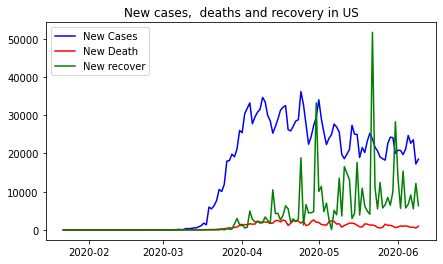

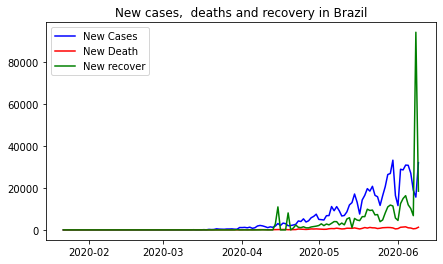

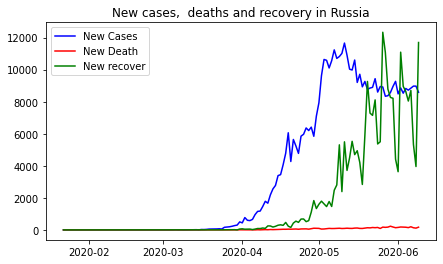

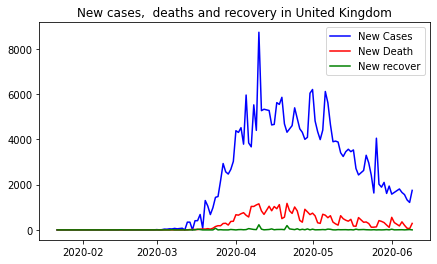

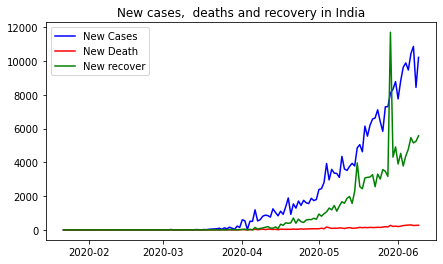

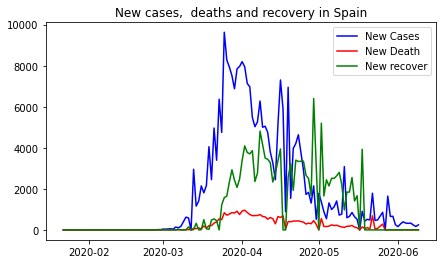

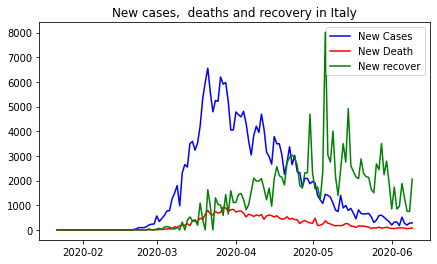

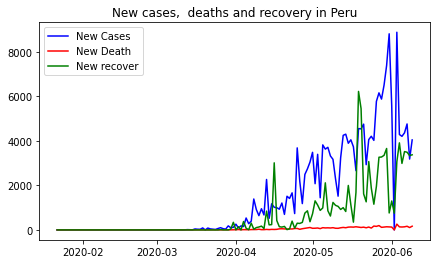

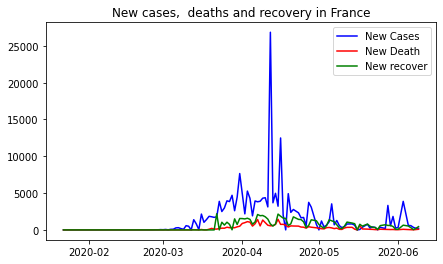

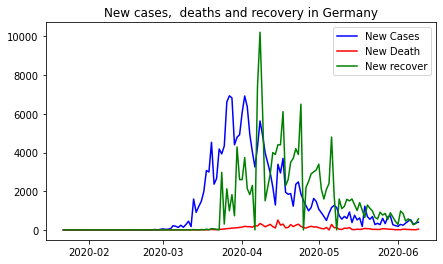

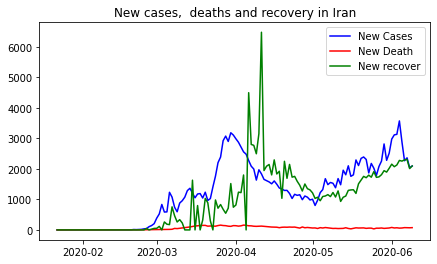

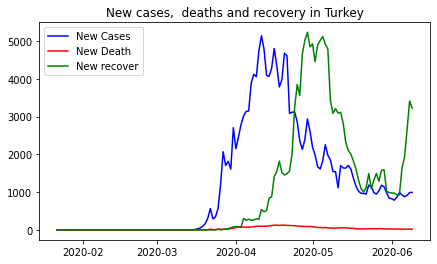

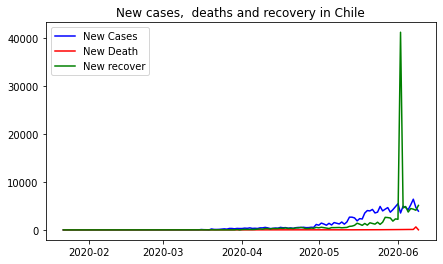

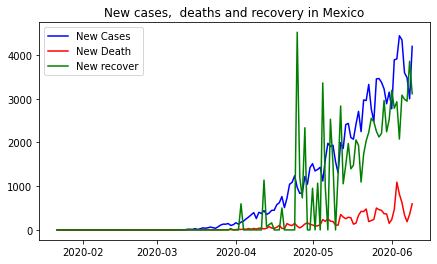

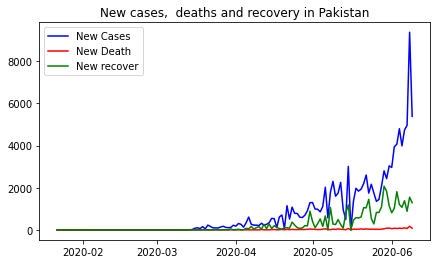

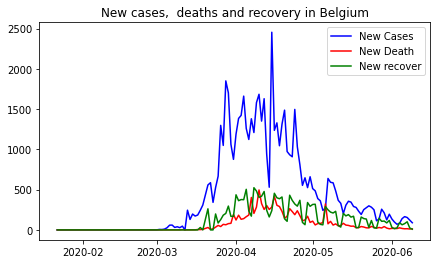

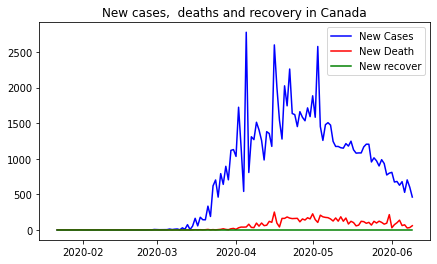

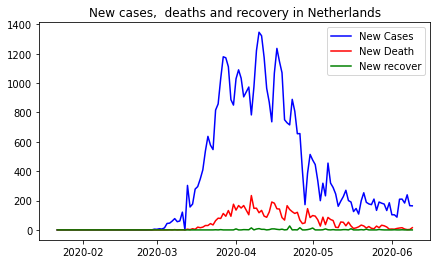

In [367]:
database = []
for country in maxrowsf:
  x = country_spread(data, country)
  database.append(x)

In [368]:
# plotting geographically across the world map
map_data = data[data['Date'] == max(data.Date)]
map_data1 = map_data.groupby(['Country/Region'])['Confirmed', 'Deaths', 'Recovered'].agg(sum)
map_data1 = map_data1.reset_index()
map_data2 = map_data.groupby(['Country/Region'])['Lat', 'Long'].agg(np.mean)
map_data2 = map_data2.reset_index()
scaler = MinMaxScaler()
size_data = np.array(map_data1['Confirmed'])
size_data = size_data.reshape(-1,1)
size = scaler.fit_transform(size_data)

#BBox = (map_data2.Long.min(),   map_data2.Long.max(),  map_data2.Lat.min(),  map_data2.Lat.max())
#BBox = (map_data.Long.min(),   map_data.Long.max(),  map_data.Lat.min(),  map_data.Lat.max())

BBox = (-200, 170, -75, 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [369]:
print(BBox)

(-200, 170, -75, 100)


In [0]:
mymap = plt.imread('/content/map (1).png',0)

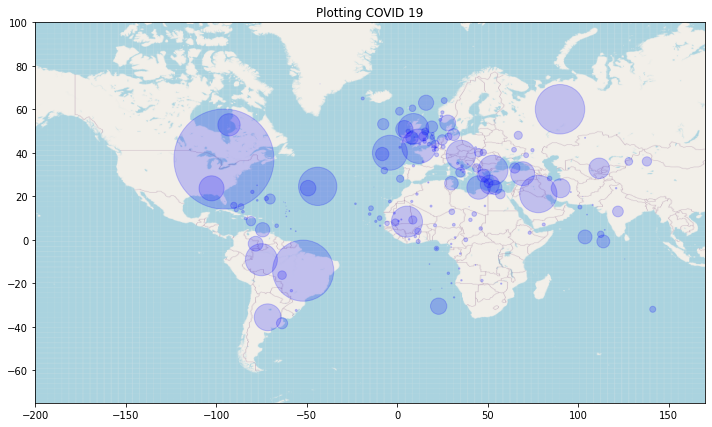

In [371]:
fig, ax = plt.subplots(figsize = (12,7))
ax.scatter(map_data2.Long, map_data2.Lat, zorder=1, alpha= 0.2, c='b', s=10000*size)
ax.set_title('Plotting COVID 19')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mymap, zorder=0, extent = BBox, aspect= 'auto')

In [0]:
#We can clearly see the devastating impact on the US and Europe